# Matts Notebook

In [167]:
#Import the relevant packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score,recall_score,precision_score,\
                            f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris

In [130]:
iris = load_iris() 
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [131]:
# petal length and width features
feature_used = iris.feature_names[2:]
X = iris.data[:, 2:] 
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((120, 2), (30, 2))

## Building functions for project

In [ ]:
#Standard Scaler
def SS(X_train,X_test):
    ss=StandardScaler()
    ss.fit_transform(X_train)
    ss.fit(X_test)

In [132]:
#Logistic Regression
def logreg(X_train,X_test,y_train,y_test,cv=5):
    #Instantiate logistic regression
    log=LogisticRegression(random_state=42)
    #Fit it on train data
    log.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=log.predict(X_test)
    
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(log, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    
    #Examine accuracy,recall,precision and f1 scores
    acc_score=accuracy_score(y_test,y_pred)
    print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precision_score(y_test,y_pred)
   # print(f'precision score: {prec_score}')
   # f1_score=f1_score(y_test,y_pred)
   # print(f'f1 score: {f1_score}')
    
    #Plot an roc curve, only works with binary data
    #plot_roc_curve(log, X_train, y_train);
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(log, X_train, y_train);
    

Cross val mean score: 0.9666666666666668
accuracy score: 0.9666666666666667


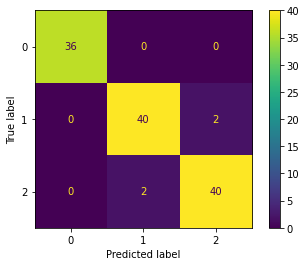

In [133]:
logreg(X_train,X_test,y_train,y_test)

In [134]:
#for index in range(1,33,2):
    #knn_model = KNeighborsClassifier(n_neighbors=index)
    #knn_log_loss = -1 * cross_val_score(knn_model, X_train,
                                       # y_train, scoring="neg_log_loss").mean()
    #print(f"# of Neighbors: {index}, Log Loss Score: {knn_log_loss}")

In [135]:
#def low_log_loss():
knn_dict={}
for index in range(1,33,2):
        knn_model = KNeighborsClassifier(n_neighbors=index)
        knn_log_loss = -1 * cross_val_score(knn_model, X_train,
                                        y_train, scoring="neg_log_loss").mean()
        knn_dict[index]=(knn_log_loss)
min_knn= min(knn_dict.values())
low_key = list(knn_dict.keys())[list(knn_dict.values()).index(min_knn)]
print(low_key)
print(min_knn)

7
0.0845337148363298


In [162]:
grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']
}

In [163]:
grid_knn=KNeighborsClassifier()
grid_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [164]:
gs = GridSearchCV(estimator=grid_knn, param_grid=grid, cv=5)

In [165]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],
                         'weights': ['uniform', 'distance']})

In [166]:
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

In [119]:
#gs.cv_results_

In [120]:
#K nearest neighbors
def KNN(X_train,X_test,y_train,y_test,metric='minkowski',cv=5):
    #Instantiate K nearest neighbors
    #def low_log_loss():
    knn_dict={}
    for index in range(1,33,2):
        knn_model = KNeighborsClassifier(n_neighbors=index)
        knn_log_loss = -1 * cross_val_score(knn_model, X_train,
                                        y_train, scoring="neg_log_loss").mean()
        knn_dict[index]=(knn_log_loss)
    min_knn= min(knn_dict.values())
    low_key = list(knn_dict.keys())[list(knn_dict.values()).index(min_knn)]
    knn=KNeighborsClassifier(n_neighbors=low_key,metric=metric)
    #Fit it on train data
    knn.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=knn.predict(X_test)
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(knn, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    
    #Examine accuracy,recall,precision and f1 scores
    acc_score=accuracy_score(y_test,y_pred)
    print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precison_score(y_test,y_pred)
    #print(f'precision score: {prec_score}')
    #f1_score=f1_score(y_test,y_pred)
   # print(f'f1 score: {f1_score}')
    
    #Plot an roc curve
    #plot_roc_curve(knn, X_train, y_train);
    
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(knn, X_train, y_train);
    

Cross val mean score: 0.9583333333333334
accuracy score: 0.9666666666666667


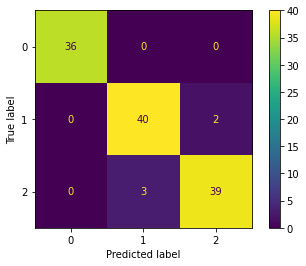

In [121]:
KNN(X_train,X_test,y_train,y_test)

In [122]:
#Decision Trees
def dtree(X_train,X_test,y_train,y_test,max_depth=3,criterion='gini',cv=5):
    #Instantiate decision tree
    Dtree=DecisionTreeClassifier(max_depth=max_depth,criterion=criterion,random_state=42)
    #Fit it on train data
    Dtree.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=Dtree.predict(X_test)
    
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(Dtree, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    
    #Examine accuracy,recall,precision and f1 scores
    acc_score=accuracy_score(y_test,y_pred)
    print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precison_score(y_test,y_pred)
    #print(f'precision score: {prec_score}')
    #f1_score=f1_score(y_test,y_pred)
    #print(f'f1 score: {f1_score}')
    
    #Plot an roc curve
    #plot_roc_curve(Dtree, X_train, y_train);
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(Dtree, X_train, y_train);

In [157]:
grid_dtree = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'criterion': ['gini', 'entropy']
}

In [158]:
grid_dtree2=DecisionTreeClassifier()
grid_dtree2.fit(X_train,y_train)

DecisionTreeClassifier()

In [159]:
gs2 = GridSearchCV(estimator=grid_dtree2, param_grid=grid_dtree, cv=5)

In [160]:
gs2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15]})

In [161]:
gs2.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

Cross val mean score: 0.9583333333333333
accuracy score: 0.9666666666666667


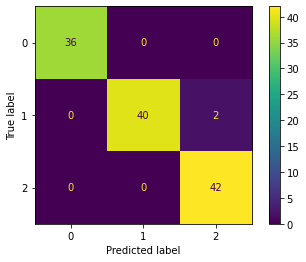

In [123]:
dtree(X_train,X_test,y_train,y_test)

In [170]:
def random_forest(X_train,X_test,y_train,y_test,n_estimators=100,criterion='gini',cv=5):
    #Instantiate decision tree
    rforest=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion)
    #Fit it on train data
    rforest.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=rforest.predict(X_test)
    
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(rforest, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    #print forest score
    score=rforest.score(X_test,y_test)
    print(f'Random Forest Score: {score}')
    
    #Examine accuracy,recall,precision and f1 scores
    #acc_score=accuracy_score(y_test,y_pred)
    #print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precison_score(y_test,y_pred)
    #print(f'precision score: {prec_score}')
    #f1_score=f1_score(y_test,y_pred)
    #print(f'f1 score: {f1_score}')
    
    #Plot an roc curve
    #plot_roc_curve(Dtree, X_train, y_train);
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(rforest, X_train, y_train);

Cross val mean score: 0.9666666666666668
Random Forest Score: 0.9666666666666667


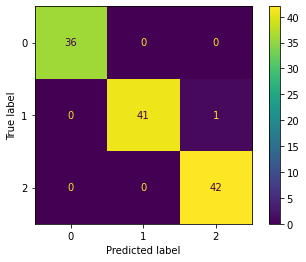

In [171]:
random_forest(X_train,X_test,y_train,y_test,n_estimators=100,criterion='gini',cv=5)

In [172]:
def bagged(X_train,X_test,y_train,y_test,n_estimators=100,criterion='gini',cv=5,max_depth=3):
    #Instantiate decision tree
    bagging=BaggingClassifier(DecisionTreeClassifier(max_depth=max_depth,criterion=criterion),
                              n_estimators=n_estimators)
    #Fit it on train data
    bagging.fit(X_train,y_train)
    #Create y_pred using test data
    y_pred=bagging.predict(X_test)
    
    #Use cross_val_score with cv folds
    cv_results = cross_val_score(bagging, X_train, y_train, cv=cv)
    print(f'Cross val mean score: {cv_results.mean()}')
    #print forest score
    score=bagging.score(X_test,y_test)
    print(f'Random Forest Score: {score}')
    
    #Examine accuracy,recall,precision and f1 scores
    #acc_score=accuracy_score(y_test,y_pred)
    #print(f'accuracy score: {acc_score}')
    #rec_score=recall_score(y_test,y_pred)
    #print(f'recall score: {rec_score}')
    #prec_score=precison_score(y_test,y_pred)
    #print(f'precision score: {prec_score}')
    #f1_score=f1_score(y_test,y_pred)
    #print(f'f1 score: {f1_score}')
    
    #Plot an roc curve
    #plot_roc_curve(Dtree, X_train, y_train);
    
    #Plot and examine confusion matrix
    plot_confusion_matrix(bagging, X_train, y_train);

Cross val mean score: 0.975
Random Forest Score: 0.9666666666666667


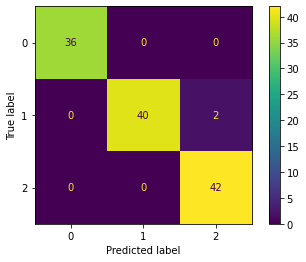

In [173]:
bagged(X_train,X_test,y_train,y_test,n_estimators=100,criterion='gini',cv=5,max_depth=3)